In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
plt.rcParams['font.size']='14'



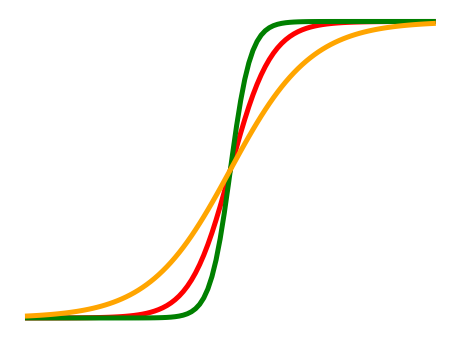

In [4]:

z=np.linspace(-10,10,num=100)
plt.figure(figsize=(8,6))
plt.plot(1/(1+np.exp(-z)),'r',linewidth=5)
plt.plot(1/(1+np.exp(-2*z)),'g',linewidth=5)
plt.plot(1/(1+np.exp(-0.5*z)),'orange',linewidth=5)
#plt.plot(1/(1+np.exp(-0.5*(z+1))),'orange',linewidth=5)
plt.axis('off')
plt.savefig('sigmoid_logreg.png',dpi=350)

In [5]:
p=np.linspace(0,1,num=10)
p

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

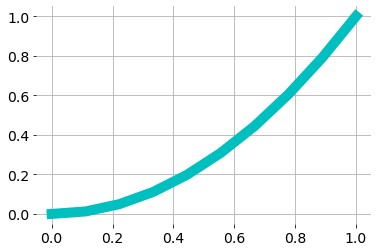

In [6]:
plt.plot(p,p*p,'c',linewidth=10)
plt.box(False)
plt.grid()
plt.savefig('likelihood_logreg.png',dpi=350)

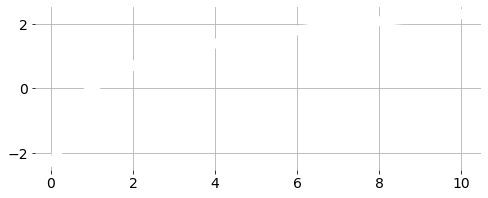

In [7]:
plt.figure(figsize=(8,3))
xlog=np.linspace(0.1,10,num=100)
plt.plot(xlog,np.log(xlog),'w',linewidth=10)
plt.box(False)
plt.grid()
#plt.axis('off')
plt.savefig('log_logreg.png',dpi=350)

/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50889/1224726863.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,-np.log(x),'c',label='-log(x)',linewidth=10)
/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50889/1224726863.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,-np.log(1-x),'orange',label='-log(1-x)',linewidth=10)


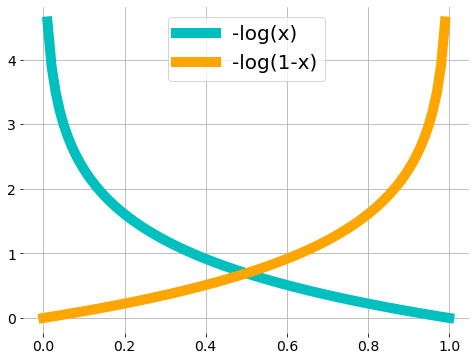

In [8]:
x=np.linspace(0,1,num=100)
plt.figure(figsize=(8,6))
plt.plot(x,-np.log(x),'c',label='-log(x)',linewidth=10)
plt.plot(x,-np.log(1-x),'orange',label='-log(1-x)',linewidth=10)
plt.grid()
plt.box(False)
plt.legend(fontsize=20)
plt.savefig('logloss_logreg.png',dpi=350)

/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


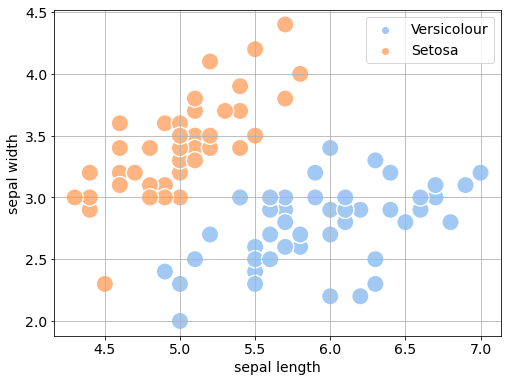

In [9]:
iris=datasets.load_iris()

Xy=np.array([iris.data[:100,0],iris.data[:100,1],iris.target[:100]]).T
np.random.shuffle(Xy)

d = {0:'Setosa', 1:'Versicolour'}

plt.figure(figsize=(8,6))
sns.scatterplot(Xy[:,0],Xy[:,1],hue=[d[y] for y in Xy[:,2]],s=300,palette='pastel')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('iris_samples_logreg.png',dpi=350)

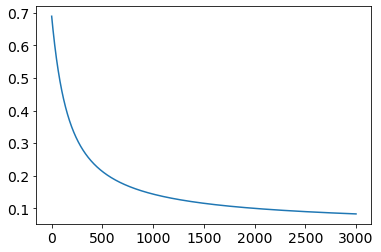

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def crossentropy_loss(X,y,theta):
    
    h=sigmoid(X@theta)
    
    return ((1/len(y))*(((-y).T@np.log(h+1e-5))-((1-y).T@np.log(1-h+1e-5))))[0][0]
    
def predict(X,theta):
    #round up probabilities
    return np.round(sigmoid(X@theta))

X,y=Xy[:,:2],Xy[:,2]
#X,y=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,
#                        n_clusters_per_class=1, random_state=14)
X=np.hstack((np.ones((len(X),1)),X))
y=y[:,np.newaxis]
#theta=np.random.rand(X.shape[1],1)
theta=np.zeros((X.shape[1],1))
theta_all=[]

N=3000
lr=0.05
n=len(y) #number of data points
losses=[]

for i in range(N):
    
    theta_all.append(theta)
    h=sigmoid(X@theta)
    grad=X.T@(h-y)
    theta=theta-(lr/n)*grad
    losses.append(crossentropy_loss(X,y,theta))

plt.plot(losses)

In [14]:
x_new=np.array([1,5.6,3.3]).reshape(1,3)
predict(x_new,theta)

array([[0.]])

/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


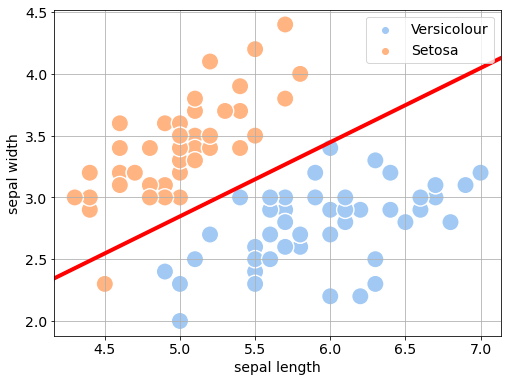

In [15]:
slope=-(theta[1]/theta[2])
intercept=-(theta[0]/theta[2])

plt.figure(figsize=(8,6))
sns.scatterplot(Xy[:,0],Xy[:,1],hue=[d[y] for y in Xy[:,2]],s=300,palette='pastel')
#sns.scatterplot(X[:,1],X[:,2],hue=[y[i][0] for i in range(len(y))],s=300,palette='pastel')
ax=plt.gca()
ax.autoscale(False)
x_vals=np.array(ax.get_xlim())
y_vals=intercept+slope*x_vals
plt.plot(x_vals,y_vals,'r',linewidth=4)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('decisionboundary_logreg.png',dpi=350)




/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50889/2359949430.py:8: RuntimeWarning: invalid value encountered in true_divide
  slope=-(theta[1]/theta[2])
/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50889/2359949430.py:9: RuntimeWarning: invalid value encountered in true_divide
  intercept=-(theta[0]/theta[2])


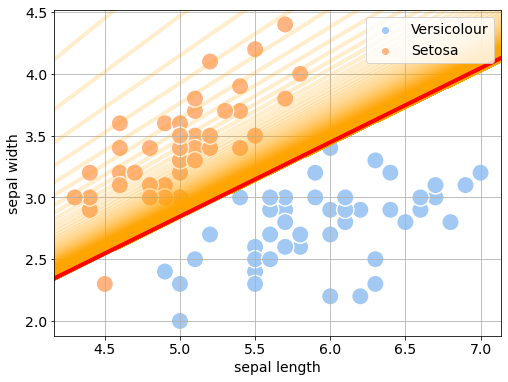

In [16]:

plt.figure(figsize=(8,6))
sns.scatterplot(Xy[:,0],Xy[:,1],hue=[d[y] for y in Xy[:,2]],s=300,palette='pastel')
ax=plt.gca()
ax.autoscale(False)
x_vals=np.array(ax.get_xlim())

for theta in theta_all:
    slope=-(theta[1]/theta[2])
    intercept=-(theta[0]/theta[2])
    y_vals=intercept+slope*x_vals
    plt.plot(x_vals,y_vals,'orange',linewidth=4,alpha=0.2)

plt.plot(x_vals,y_vals,'r',linewidth=4)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('decisionboundary_logreg.png',dpi=350)

Setosa


/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


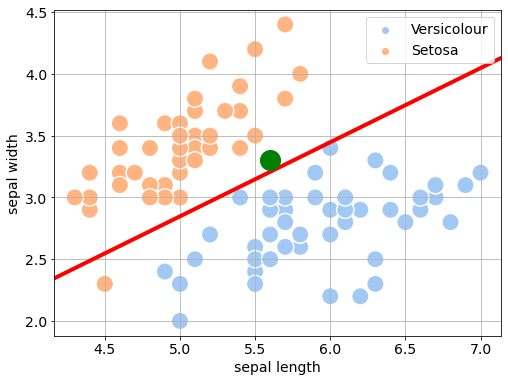

In [17]:
x_new=np.array([1,5.6,3.3]).reshape(1,3)
print(d[predict(x_new,theta)[0][0]])

slope=-(theta[1]/theta[2])
intercept=-(theta[0]/theta[2])

plt.figure(figsize=(8,6))
sns.scatterplot(Xy[:,0],Xy[:,1],hue=[d[y] for y in Xy[:,2]],s=300,palette='pastel')
ax=plt.gca()
ax.autoscale(False)
x_vals=np.array(ax.get_xlim())
y_vals=intercept+slope*x_vals
plt.plot(x_vals,y_vals,'r',linewidth=4)
plt.plot(x_new[0,1],x_new[0,2],'go',markersize=20)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('prediction_logreg.png',dpi=350)

In [18]:
X,y=Xy[:,:2],Xy[:,2]
X=np.hstack((np.ones((len(X),1)),X))
y=y[:,np.newaxis]

def batch_gradient(X,y,N=2000,lr=0.05):
    #theta=np.random.rand(X.shape[1],1)
    theta=np.zeros((X.shape[1],1))
    thetas=[]
    grads=[]

    n=len(y) #number of data points
    losses=[]

    for i in range(N):

        thetas.append(theta)
        h=sigmoid(X@theta)
        grad=X.T@(h-y)
        theta=theta-(lr/n)*grad
        grads.append(grad)
        losses.append(crossentropy_loss(X,y,theta))

    return losses, thetas, grads

lbatch,thetas, grads=batch_gradient(X,y)

In [19]:
def stochastic_gradient(X,y,N=2000,lr=0.05):
    #theta=np.random.rand(X.shape[1],1)
    theta=np.zeros((X.shape[1],1))
    thetas=[]
    grads=[]

    n=len(y) #number of data points
    losses=[]

    for i in range(N):
        loss=0
        for j in range(n):
            thetas.append(theta)
            h=sigmoid(X[j,:].reshape(1,3)@theta)
            grad=(X[j,:].reshape(3,1))@(h-y[j].reshape(1,1))
            theta=theta-lr*grad
            grads.append(grad)
            loss+=crossentropy_loss(X[j,:].reshape(1,3),y[j].reshape(1,1),theta)
            #print(loss)
        losses.append(loss/n)

    return losses, thetas, grads

lsgd,t,g=stochastic_gradient(X,y)

In [20]:
def minibatch_gradient(X,y,batch_size=10,N=2000,lr=0.05):
    #theta=np.random.rand(X.shape[1],1)
    theta=np.zeros((X.shape[1],1))
    thetas=[]
    grads=[]

    n=len(y) #number of data points
    losses=[]

    for i in range(N):
        loss=0
        
        for j in range(0,n,batch_size):
            thetas.append(theta)
            
            X_batch=X[j:j+batch_size]
            y_batch=y[j:j+batch_size]
            #X[idx,:].shape
            h=sigmoid(X_batch@theta)
            #print(h.shape,y_batch.shape)
            grad=X_batch.T@(h-y_batch)
            theta=theta-(lr/batch_size)*grad
            grads.append(grad)
            loss+=crossentropy_loss(X_batch,y_batch,theta)
            #print(loss)
        losses.append(loss/len(range(0,n,batch_size)))

    return losses, thetas, grads

lmini,t,g=minibatch_gradient(X,y)

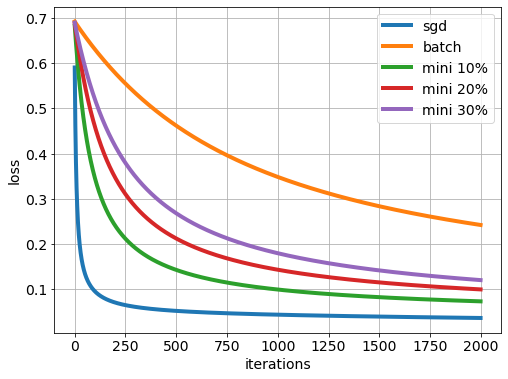

In [21]:
X,y=Xy[:,:2],Xy[:,2]
X=np.hstack((np.ones((len(X),1)),X))
y=y[:,np.newaxis]
lbatch,_,_=batch_gradient(X,y,N=2000,lr=0.01)
lsgd,_,_=stochastic_gradient(X,y,N=2000,lr=0.01)
lmini10,t,g=minibatch_gradient(X,y,batch_size=10,N=2000,lr=0.01)
lmini20,t,g=minibatch_gradient(X,y,batch_size=20,N=2000,lr=0.01)
lmini30,t,g=minibatch_gradient(X,y,batch_size=30,N=2000,lr=0.01)
plt.figure(figsize=(8,6))
plt.plot(lsgd,label='sgd',linewidth=4)
plt.plot(lbatch,label='batch',linewidth=4)
plt.plot(lmini10,label='mini 10%',linewidth=4)
plt.plot(lmini20,label='mini 20%',linewidth=4)
plt.plot(lmini30,label='mini 30%',linewidth=4)
#plt.xlim([0,1000])

plt.legend()
plt.grid()
plt.xlabel('iterations')
plt.ylabel('loss')
plt.savefig('minibatch_logreg.png',dpi=350)

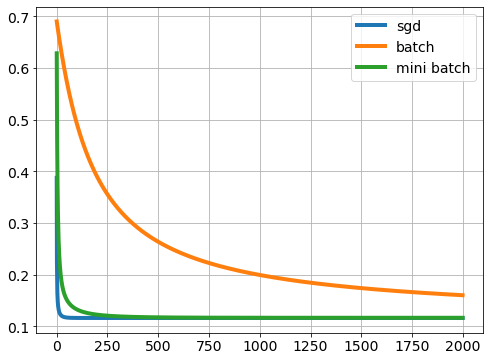

In [26]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                        n_clusters_per_class=1, random_state=14)
X=np.hstack((np.ones((len(X),1)),X))
y=y[:,np.newaxis]

lbatch,_,_=batch_gradient(X,y,N=2000,lr=0.01)
lsgd,_,_=stochastic_gradient(X,y,N=2000,lr=0.01)
lmini,t,g=minibatch_gradient(X,y,batch_size=10,N=2000,lr=0.01)
plt.figure(figsize=(8,6))
plt.plot(lsgd,label='sgd',linewidth=4)
plt.plot(lbatch,label='batch',linewidth=4)
plt.plot(lmini,label='mini batch',linewidth=4)
#plt.xlim([0,1000])
plt.legend()
plt.grid()